# Support Vector Machine (SVM)


## Modelo Epsilon-Support Vector Regression (ε-SVM Regression)

El objetivo es intentar predecir el 'track_popularity' de cualquier canción.

Para ello probaermos distintas configuraciones de modelos SVR entrenados con distintas versiones del dataset:
- Datos escalados,
- PCA de 6 componentes (sólo *musical features*),
- PCA de 9 componentes *(incluye dummies de 'genre').*


In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PCA 6 componentes

In [5]:
df = pd.read_csv('df_scaled.csv')
df_pca = pd.read_csv('df_pca6.csv')

In [6]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23081 entries, 0 to 23080
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PC0               23081 non-null  float64
 1   PC1               23081 non-null  float64
 2   PC2               23081 non-null  float64
 3   PC3               23081 non-null  float64
 4   PC4               23081 non-null  float64
 5   PC5               23081 non-null  float64
 6   track_id          23081 non-null  object 
 7   track_popularity  23081 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.4+ MB


In [7]:
y = df_pca['track_popularity']
X = df_pca.drop(columns=['track_popularity','track_id'])

Separamos el dataset en sets de entrenamiento y testeo.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento

Realizamos una búsqueda de los mejores parámetros de Support Vector Regressor para nuestro dataset.

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_hitters = SVR()

In [10]:
"""
grid = GridSearchCV(svm_hitters,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 1, 100], "gamma": [0.1, 1, 10, 100], "kernel": ["rbf", "sigmoid"]},
                     {"C": [0.01, 1, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error') 
grid.fit(X_train,y_train)
"""

'\ngrid = GridSearchCV(svm_hitters,\n                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},\n                     {"C": [0.01, 1, 100], "gamma": [0.1, 1, 10, 100], "kernel": ["rbf", "sigmoid"]},\n                     {"C": [0.01, 1, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],\n                    refit=True,\n                    cv=5,\n                    scoring=\'neg_mean_absolute_error\') \ngrid.fit(X_train,y_train)\n'

**Tiempo de ejecución: 20h** (Interrumpido sin resultados)

## Grid Search

In [11]:
param_grid_linear = [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]}]

grid_linear = GridSearchCV(svm_hitters,
                           param_grid_linear,
                           refit=True,
                           verbose=1,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_absolute_error')

grid_linear.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']}],
             scoring='neg_mean_absolute_error', verbose=1)

**Tiempo de ejecución 1: 15m 12.5s**

{'C': 0.01, 'kernel': 'linear'}

**Tiempo de ejecución 2: 16m 0s**

{'C': 5, 'kernel': 'linear'}

In [12]:
grid_linear.best_params_

{'C': 5, 'kernel': 'linear'}

In [57]:
# Guardar el objeto RandomizedSearchCV
joblib.dump(grid_linear, 'svr_results/grid_search_linear.pkl')

['svr_results/grid_search_linear.pkl']

In [58]:
# Extraer los mejores valores de C y gamma
best_params_linear = grid_linear.best_params_
best_C = best_params_linear['C']

In [59]:
# Guardar los mejores parámetros
best_params_linear = grid_linear.best_params_
joblib.dump(best_params_linear, 'svr_results/best_params_linear.pkl')

# Guardar best_C y best_gamma por separado
best_values_linear = {'best_C': best_C, 'best_kernel': best_params_linear['kernel']}
joblib.dump(best_values_linear, 'svr_results/best_values_linear.pkl')

['svr_results/best_values_linear.pkl']

In [14]:
param_grid_rbf_sigmoid = [{"C": [0.01, 1, 100], "gamma": [0.1, 1, 10, 100], "kernel": ["rbf", "sigmoid"]}]

grid_rbf_sigmoid = GridSearchCV(svm_hitters,
                                param_grid_rbf_sigmoid,
                                refit=True,
                                verbose=2,
                                cv=5,
                                n_jobs=-1,
                                scoring='neg_mean_absolute_error')

grid_rbf_sigmoid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  12.7s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  12.7s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=  12.8s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=  16.8s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=  17.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=  17.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  13.5s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  13.6s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=  13.6s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=  17.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 1, 100], 'gamma': [0.1, 1, 10, 100],
                          'kernel': ['rbf', 'sigmoid']}],
             scoring='neg_mean_absolute_error', verbose=2)

**Tiempo de ejecución 1: 14m 10s**

{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

**Tiempo de ejecución 2: 15m 53s**

{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

In [15]:
grid_rbf_sigmoid.best_params_

{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}

In [53]:
# Guardar el objeto RandomizedSearchCV
joblib.dump(grid_rbf_sigmoid, 'svr_results/grid_search_rbf_sig.pkl')

['svr_results/grid_search_rbf_sig.pkl']

In [55]:
# Extraer los mejores valores de C y gamma
best_params_rbf_sig = grid_rbf_sigmoid.best_params_
best_C = best_params_rbf_sig['C']
best_gamma = best_params_rbf_sig['gamma']

In [56]:
# Guardar los mejores parámetros
best_params_rbf_sig = grid_rbf_sigmoid.best_params_
joblib.dump(best_params_rbf_sig, 'svr_results/best_params_rbf_sig.pkl')

# Guardar best_C y best_gamma por separado
best_values_rbf_sig = {'best_C': best_C, 'best_gamma': best_gamma, 'best_kernel': best_params_rbf_sig['kernel']}
joblib.dump(best_values_rbf_sig, 'svr_results/best_values_rbf_sig.pkl')

['svr_results/best_values_rbf_sig.pkl']

Borré el código de GridSearch para poly

**Tiempo de ejecución: 7h 20m** (Interrumpido sin resultados)

## Randomized Search + Bayesian Search

In [28]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
import numpy as np

In [29]:
# Definir el modelo inicial: SVR con kernel 'poly'
model_poly = SVR(kernel='poly')

# Definir el espacio de búsqueda para RandomizedSearchCV
param_dist_poly = {
    "C": [0.01, 1, 100],
    "degree": [2, 3, 4, 5, 6]
}

# Realizar RandomizedSearchCV
random_search_poly = RandomizedSearchCV(
    estimator=model_poly,
    param_distributions=param_dist_poly,
    n_iter=10,  # Puedes ajustar este número si lo deseas
    cv=3,
    verbose=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)


print('Comienza RandomizedSearchCV …')
random_search_poly.fit(X_train, y_train)
print('RandomizedSearchCV finalizado.')

# Imprimir los mejores parámetros obtenidos
print(f"Mejores parámetros iniciales (kernel 'poly'): {random_search_poly.best_params_}")

# Obtener los mejores parámetros del RandomizedSearchCV
best_C = random_search_poly.best_params_['C']
best_degree = random_search_poly.best_params_['degree']

Comienza RandomizedSearchCV …
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .................C=0.01, degree=2;, score=-0.160 total time=   6.7s
[CV 2/3] END .................C=0.01, degree=2;, score=-0.162 total time=   6.7s
[CV 3/3] END .................C=0.01, degree=2;, score=-0.159 total time=   6.4s
[CV 3/3] END ....................C=1, degree=6;, score=-0.166 total time= 4.7min
[CV 1/3] END ....................C=1, degree=6;, score=-0.169 total time= 4.8min
[CV 2/3] END ....................C=1, degree=6;, score=-0.171 total time= 4.8min
[CV 1/3] END ....................C=1, degree=2;, score=-0.160 total time=   9.4s
[CV 2/3] END ....................C=1, degree=2;, score=-0.162 total time=   9.4s
[CV 3/3] END ....................C=1, degree=2;, score=-0.159 total time=   9.8s
[CV 2/3] END ....................C=1, degree=5;, score=-0.165 total time= 1.5min
[CV 1/3] END ....................C=1, degree=5;, score=-0.163 total time= 1.9min
[CV 1/3] END .....

**Tiempo de ejecución: 6h 10m** 

Mejores parámetros iniciales (kernel 'poly'): {'degree': 2, 'C': 0.01}

In [19]:
import joblib

In [68]:
# Guardar el objeto RandomizedSearchCV
joblib.dump(random_search_poly, 'svr_results/random_search_rnd_poly.pkl')

['random_search_poly.pkl']

In [69]:
# Guardar los mejores parámetros
best_params_poly = random_search_poly.best_params_
joblib.dump(best_params_poly, 'svr_results/best_params_rnd_poly.pkl')

# Guardar best_C y best_degree por separado
best_values = {'best_C': best_C, 'best_degree': best_degree}
joblib.dump(best_values, 'svr_results/best_values_rnd_poly.pkl')

['best_values.pkl']

# Importar BayesSearchCV

In [16]:
# Importar BayesSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [20]:
# Cargar el objeto RandomizedSearchCV
random_search_poly = joblib.load('svr_results/random_search_poly.pkl')

In [23]:

# Cargar los mejores parámetros
best_params_poly = joblib.load('svr_results/best_params_poly.pkl')
best_C = best_params_poly['C']
best_degree = best_params_poly['degree']


In [ ]:
"""
# Cargar best_C y best_degree
best_values = joblib.load('svr_results/best_values.pkl')
best_C = best_values['best_C']
best_degree = best_values['best_degree']
"""

In [24]:
# Definir el espacio de búsqueda refinado para BayesSearchCV
param_dist_poly = {
    'C': Real(max(0.01, best_C * 0.5), best_C * 2, prior='log-uniform'),
    'degree': Integer(max(2, best_degree - 1), min(6, best_degree + 1)),
    'kernel': ['poly']
}

# Usar BayesSearchCV para búsqueda fina
bayes_search_poly = BayesSearchCV(
    estimator=SVR(kernel='poly'),
    search_spaces=param_dist_poly,
    n_iter=30,  # Más iteraciones para una búsqueda más exhaustiva
    cv=5,
    verbose=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42
)

print('Comienza BayesSearchCV …')
bayes_search_poly.fit(X_train, y_train)
print('BayesSearchCV finalizado.')

# Imprimir los mejores parámetros refinados
print(f"Mejores parámetros refinados (kernel 'poly'): {bayes_search_poly.best_params_}")

Comienza BayesSearchCV …
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=0.013287815610330047, degree=3, kernel=poly;, score=-0.161 total time=   6.7s
[CV 2/5] END C=0.013287815610330047, degree=3, kernel=poly;, score=-0.161 total time=   6.7s
[CV 5/5] END C=0.013287815610330047, degree=3, kernel=poly;, score=-0.160 total time=   6.6s
[CV 3/5] END C=0.013287815610330047, degree=3, kernel=poly;, score=-0.163 total time=   6.7s
[CV 4/5] END C=0.013287815610330047, degree=3, kernel=poly;, score=-0.159 total time=   6.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END C=0.017868126276991084, degree=3, kernel=poly;, score=-0.163 total time=   6.0s
[CV 5/5] END C=0.017868126276991084, degree=3, kernel=poly;, score=-0.160 total time=   6.0s
[CV 4/5] END C=0.017868126276991084, degree=3, kernel=poly;, score=-0.159 total time=   6.1s
[CV 1/5] END C=0.017868126276991084, degree=3, kernel=poly;, score=-0.161 total time=   5.4s
[CV 2/5] END C=0.017

**Tiempo de ejecución: 3m 25s** 

Mejores parámetros refinados (kernel 'poly'): OrderedDict({'C': 0.013203785556797243, 'degree': 2, 'kernel': 'poly'})


In [51]:
# Guardar el objeto RandomizedSearchCV
joblib.dump(bayes_search_poly, 'svr_results/bayes_search_poly.pkl')

['svr_results/bayes_search_poly.pkl']

In [52]:
# Guardar los mejores parámetros
best_params_poly = bayes_search_poly.best_params_
joblib.dump(best_params_poly, 'svr_results/best_params_bay_poly.pkl')

# Guardar best_C y best_degree por separado
best_values = {'best_C': best_C, 'best_degree': best_degree}
joblib.dump(best_values, 'svr_results/best_values_bay_poly.pkl')

['svr_results/best_values_bay_poly.pkl']

## Análisis de Resultados

In [25]:
best_params_linear = grid_linear.best_params_
best_score_linear = grid_linear.best_score_
print()
print(f"Mejores parámetros refinados (kernel 'linear'): {bayes_search_poly.best_params_}")

best_params_rbf_sigmoid = grid_rbf_sigmoid.best_params_
best_score_rbf_sigmoid = grid_rbf_sigmoid.best_score_

best_params_poly_rnd = random_search_poly.best_params_
best_score_poly_rnd = random_search_poly.best_score_

best_params_poly_bay = bayes_search_poly.best_params_
best_score_poly_bay = bayes_search_poly.best_score_

In [35]:
# Crear un diccionario para almacenar los resultados de cada búsqueda
results = {}

# Para el kernel 'linear'
results_linear = pd.DataFrame(grid_linear.cv_results_)
results_linear['kernel'] = 'linear'  # Añadimos una columna para identificar el kernel
results['linear'] = results_linear

# Para los kernels 'rbf' y 'sigmoid'
results_rbf_sigmoid = pd.DataFrame(grid_rbf_sigmoid.cv_results_)
results_rbf_sigmoid['kernel'] = 'rbf_sigmoid'  # Añadimos una columna para identificar el kernel
# Los kernels 'rbf' y 'sigmoid' ya están especificados en 'param_kernel'
results['rbf_sigmoid'] = results_rbf_sigmoid

# Para el kernel 'poly'
results_poly_rnd = pd.DataFrame(random_search_poly.cv_results_)
results_poly_rnd['kernel'] = 'poly'
results['poly'] = results_poly_rnd

results_poly_bay = pd.DataFrame(bayes_search_poly.cv_results_)
results_poly_bay['kernel'] = 'poly'
results['poly'] = results_poly_bay

# Combinar todos los resultados en un solo DataFrame
all_results = pd.concat(results.values(), ignore_index=True)

In [36]:
all_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,kernel,param_gamma,param_degree
0,7.614177,0.070521,1.118652,0.011127,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",-0.160226,-0.160086,-0.162268,-0.158646,-0.159227,-0.160091,0.001232,2,linear,NaN,NaN
1,9.459782,0.346048,1.208647,0.133480,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",-0.160226,-0.160087,-0.162271,-0.158641,-0.159237,-0.160092,0.001233,4,linear,NaN,NaN
2,27.237295,0.652843,1.424638,0.156228,1,linear,"{'C': 1, 'kernel': 'linear'}",-0.160226,-0.160088,-0.162275,-0.158644,-0.159230,-0.160093,0.001235,5,linear,NaN,NaN
3,83.441741,2.483717,1.037893,0.041161,5,linear,"{'C': 5, 'kernel': 'linear'}",-0.160225,-0.160083,-0.162271,-0.158647,-0.159224,-0.160090,0.001233,1,linear,NaN,NaN
4,130.787092,8.686166,1.031781,0.078469,10,linear,"{'C': 10, 'kernel': 'linear'}",-0.160227,-0.160083,-0.162272,-0.158646,-0.159232,-0.160092,0.001233,3,linear,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,5.017172,0.053311,0.785352,0.020007,0.012849,poly,"{'C': 0.012848917284402758, 'degree': 3, 'kern...",-0.160575,-0.160653,-0.163168,-0.159072,-0.159687,-0.160631,0.001397,19,poly,NaN,3
56,5.077163,0.058971,0.867946,0.017352,0.017443,poly,"{'C': 0.01744270377126299, 'degree': 3, 'kerne...",-0.160588,-0.160661,-0.163187,-0.159066,-0.159690,-0.160638,0.001405,28,poly,NaN,3
57,4.993726,0.012789,0.755816,0.007939,0.015403,poly,"{'C': 0.015402950166589598, 'degree': 2, 'kern...",-0.159878,-0.160463,-0.162719,-0.158819,-0.159404,-0.160257,0.001345,12,poly,NaN,2
58,4.946245,0.015486,0.892497,0.004730,0.012536,poly,"{'C': 0.012535781609407224, 'degree': 2, 'kern...",-0.159878,-0.160459,-0.162724,-0.158815,-0.159406,-0.160256,0.001347,10,poly,NaN,2


In [38]:
# Ahora, encontrar el mejor modelo basado en la puntuación media de validación cruzada
# Dado que estamos utilizando 'neg_mean_absolute_error', una puntuación más alta (menos negativa) es mejor
best_index = all_results['mean_test_score'].idxmax()
best_model = all_results.iloc[best_index]

print("Mejor modelo:")
print(best_model[['kernel', 'param_kernel', 'param_C', 'param_gamma', 'param_degree', 'mean_test_score']])

Mejor modelo:
kernel             rbf_sigmoid
param_kernel               rbf
param_C                   0.01
param_gamma                0.1
param_degree               NaN
mean_test_score      -0.159841
Name: 6, dtype: object


In [39]:
#Si deseas ver todos los parámetros del mejor modelo
print("\nTodos los parámetros del mejor modelo:")
print(best_model)


Todos los parámetros del mejor modelo:
mean_fit_time                                          8.094525
std_fit_time                                           0.033116
mean_score_time                                        4.669354
std_score_time                                         0.039178
param_C                                                    0.01
param_kernel                                                rbf
params               {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
split0_test_score                                     -0.159965
split1_test_score                                     -0.160048
split2_test_score                                     -0.161677
split3_test_score                                     -0.158521
split4_test_score                                     -0.158992
mean_test_score                                       -0.159841
std_test_score                                         0.001085
rank_test_score                                               1


In [44]:
# Filtrar los resultados para el kernel 'poly'
poly_results = all_results[all_results['kernel'] == 'poly'].copy()

In [45]:
# Analizamos la mejor configuración para kernel polinomial
best_index_poly = poly_results['mean_test_score'].idxmax()
best_model_poly = poly_results.iloc[best_index]

print("Mejores parámestros para 'poly':")
print(best_model_poly[['kernel', 'param_kernel', 'param_C', 'param_gamma', 'param_degree', 'mean_test_score']])

Mejores parámestros para 'poly':
kernel                 poly
param_kernel           poly
param_C            0.015338
param_gamma             NaN
param_degree              3
mean_test_score   -0.160637
Name: 36, dtype: object


In [41]:
""""

{'linear': {'params': {'C': 0.01, 'kernel': 'linear'},
  'score': -0.16009066161065164},
 'rbf_sigmoid': {'params': {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'},
  'score': -0.1598405126301487},
 'poly': {'params': {'degree': 2, 'C': 0.01}, 'score': -0.1602616449570914}}

"""

'"\n\n{\'linear\': {\'params\': {\'C\': 0.01, \'kernel\': \'linear\'},\n  \'score\': -0.16009066161065164},\n \'rbf_sigmoid\': {\'params\': {\'C\': 0.01, \'gamma\': 0.1, \'kernel\': \'rbf\'},\n  \'score\': -0.1598405126301487},\n \'poly\': {\'params\': {\'degree\': 2, \'C\': 0.01}, \'score\': -0.1602616449570914}}\n\n'

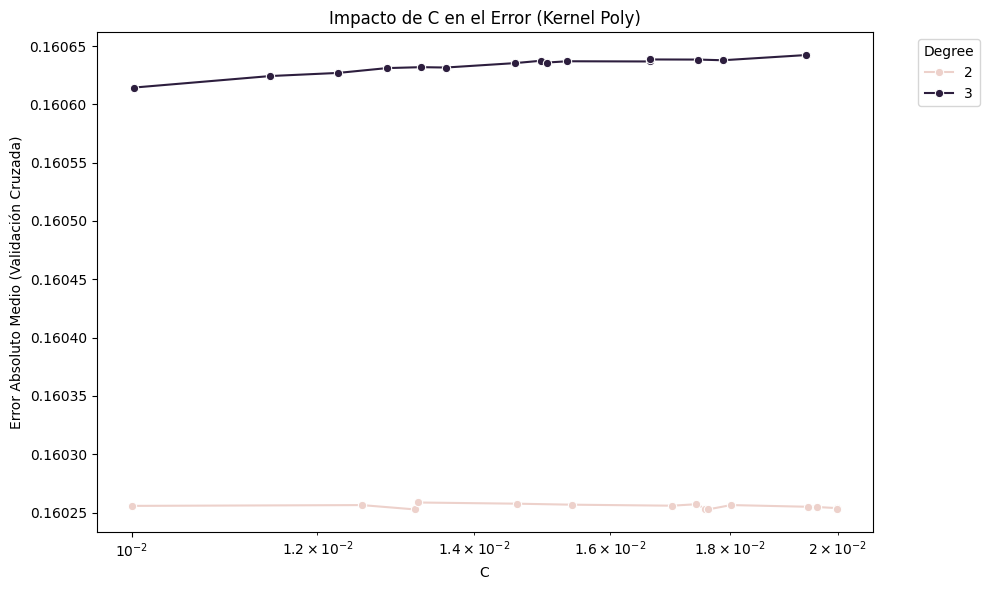

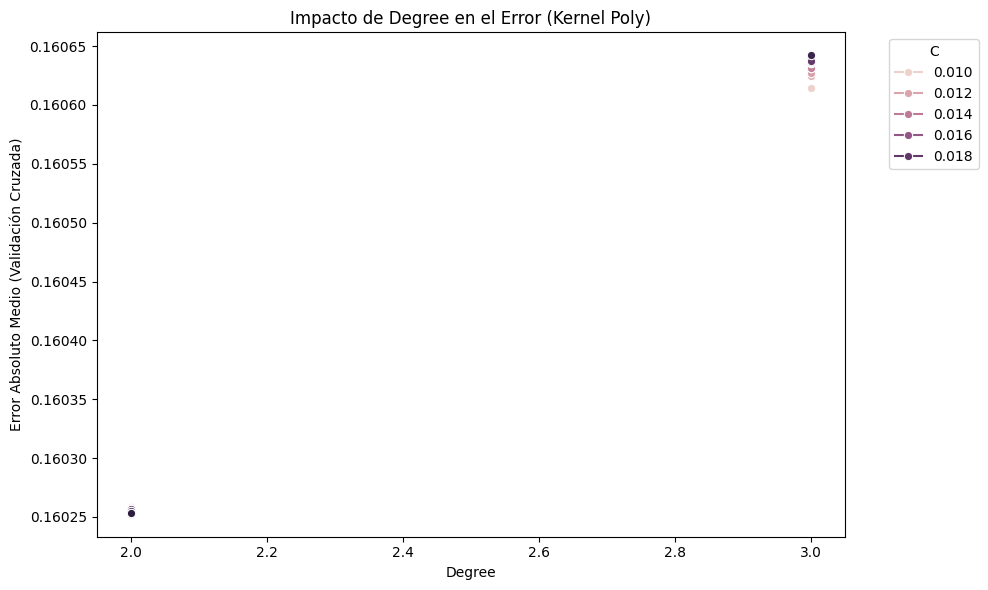

In [46]:
# Convertir los valores negativos de la puntuación a errores positivos
poly_results['mean_absolute_error'] = -poly_results['mean_test_score']

# Convertir 'param_C' y 'param_degree' a tipos numéricos si es necesario
poly_results['param_C'] = poly_results['param_C'].astype(float)
poly_results['param_degree'] = poly_results['param_degree'].astype(int)

# Gráfico 1: Error vs. C para diferentes valores de degree
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=poly_results,
    x='param_C',
    y='mean_absolute_error',
    hue='param_degree',
    marker='o'
)
plt.title('Impacto de C en el Error (Kernel Poly)')
plt.xlabel('C')
plt.ylabel('Error Absoluto Medio (Validación Cruzada)')
plt.xscale('log')  # Escala logarítmica si C varía en órdenes de magnitud
plt.legend(title='Degree', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Gráfico 2: Error vs. Degree para diferentes valores de C
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=poly_results,
    x='param_degree',
    y='mean_absolute_error',
    hue='param_C',
    marker='o'
)
plt.title('Impacto de Degree en el Error (Kernel Poly)')
plt.xlabel('Degree')
plt.ylabel('Error Absoluto Medio (Validación Cruzada)')
plt.legend(title='C', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [64]:
all_results.to_csv('svr_results.csv', index=False)

## Comparación de Métricas

In [47]:
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

In [62]:
# Extraer los parámetros del mejor modelo
params = {}
params['kernel'] = best_model['param_kernel']
params['C'] = best_model['param_C']

# Algunos parámetros pueden ser NaN si no aplican al kernel seleccionado
if not pd.isna(best_model.get('param_gamma')):
    params['gamma'] = best_model['param_gamma']

if not pd.isna(best_model.get('param_degree')):
    params['degree'] = int(best_model['param_degree'])

# Crear y entrenar el modelo con los mejores parámetros
best_svr_model = SVR(**params)
best_svr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_svr_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MAE de testeo fue: {mae}")
print(f"RMSE de testeo fue: {rmse}")
print(f"MAPE de testeo fue: {mape}")
print(f"R2 de testeo fue: {r2}")

MAE de testeo fue: 0.15994229831958814
RMSE de testeo fue: 0.1943452915874804
MAPE de testeo fue: 10542280272399.533
R2 de testeo fue: 0.010002396511244682


Comparación con el modelo polinomial

In [48]:
# Extraer los parámetros del mejor modelo
params = {}
params['kernel'] = best_model_poly['param_kernel']
params['C'] = best_model_poly['param_C']

# Algunos parámetros pueden ser NaN si no aplican al kernel seleccionado
if not pd.isna(best_model.get('param_gamma')):
    params['gamma'] = best_model['param_gamma']

if not pd.isna(best_model.get('param_degree')):
    params['degree'] = int(best_model['param_degree'])

# Crear y entrenar el modelo con los mejores parámetros
best_svr_model = SVR(**params)
best_svr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_svr_model.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MAE de testeo fue: {mae}")
print(f"RMSE de testeo fue: {rmse}")
print(f"MAPE de testeo fue: {mape}")
print(f"R2 de testeo fue: {r2}")

MAE de testeo fue: 0.16051435912036538
RMSE de testeo fue: 0.19506423091136824
MAPE de testeo fue: 10604771296271.812
R2 de testeo fue: 0.002664274934974009


Entrenamos una regresión lineal de Ridge para comparar las métricas.

In [20]:
from sklearn.linear_model import Ridge

ridge_hitters = Ridge()

grid_ridge = GridSearchCV(ridge_hitters,
                    {"alpha": np.linspace(0, 20, 1000)},
                    refit=True,
                    cv=5,
                    scoring='neg_mean_absolute_error')
grid_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.        ,  0.02002002,  0.04004004,  0.06006006,  0.08008008,
        0.1001001 ,  0.12012012,  0.14014014,  0.16016016,  0.18018018,
        0.2002002 ,  0.22022022,  0.24024024,  0.26026026,  0.28028028,
        0.3003003 ,  0.32032032,  0.34034034,  0.36036036,  0.38038038,
        0.4004004 ,  0.42042042,  0.44044044,  0.46046046,  0.48048048,
        0.5005005 ,  0.52052052,  0.5...
       19.41941942, 19.43943944, 19.45945946, 19.47947948, 19.4994995 ,
       19.51951952, 19.53953954, 19.55955956, 19.57957958, 19.5995996 ,
       19.61961962, 19.63963964, 19.65965966, 19.67967968, 19.6996997 ,
       19.71971972, 19.73973974, 19.75975976, 19.77977978, 19.7997998 ,
       19.81981982, 19.83983984, 19.85985986, 19.87987988, 19.8998999 ,
       19.91991992, 19.93993994, 19.95995996, 19.97997998, 20.        ])},
             scoring='neg_mean_absolute_error')

In [21]:
grid_ridge.best_params_

{'alpha': 0.0}

In [24]:
ridge_hitters = grid_ridge.best_estimator_

y_pred = ridge_hitters.predict(X_test)
y_pred_ridge = y_pred

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE de testeo fue: {mae}")
print(f"RMSE de testeo fue: {rmse}")
print(f"MAPE de testeo fue: {mape}")
print(f"R2 de testeo fue: {r2}")

MAE de testeo fue: 0.16069644864677907
RMSE de testeo fue: 0.1946560227523725
MAPE de testeo fue: 10382514201157.889
R2 de testeo fue: 0.006834128019646002


In [27]:
# Calcular las métricas para el modelo SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = root_mean_squared_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Calcular las métricas para el modelo de Regresión Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Crear un DataFrame para mostrar las métricas comparadas
metrics_df = pd.DataFrame({
    'Métrica': ['MAE', 'RMSE', 'MAPE', 'R²'],
    'SVR (RBF/Sigmoid)': [mae_svr, rmse_svr, mape_svr, r2_svr],
    'Regresión Ridge': [mae_ridge, rmse_ridge, mape_ridge, r2_ridge]
})

# Establecer 'Métrica' como índice
metrics_df.set_index('Métrica', inplace=True)

# Mostrar la tabla de comparación
print(metrics_df)


         SVR (RBF/Sigmoid)  Regresión Ridge
Métrica                                    
MAE           1.599423e-01     1.606964e-01
RMSE          1.943453e-01     1.946560e-01
MAPE          1.054228e+13     1.038251e+13
R²            1.000240e-02     6.834128e-03
